In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import os

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.options.display.max_rows = 5

In [14]:
p1 = "/Users/sai/Documents/00 NEU/Semester 1/"
p2 = "1 DS 5110 - Introduction to Data Management and Processing/"
p3 = "Project/NYC-Taxi-Data-Analysis/data/green/"

dpath = p1 + p2 + p3
fname = "green_samp_locid.csv"

p4 = '/Project/NYC-Taxi-Data-Analysis/taxi_zones_shapefiles/'
shp_path = p1 + p2 + p4

In [6]:
green = pd.read_csv(dpath+fname)

In [7]:
N = green.shape[0]
rperm = np.random.permutation(N)

In [8]:
# Hard limits
lon_min = -74.3
lon_max = -73.6

lat_min = 40.4
lat_max = 41.0

In [16]:
n = int(1e+4)
# n = N

green_samp = (
    green
    .iloc[rperm[:n],:]
#     .query("pickup_latitude.notnull() and \
#             pickup_longitude.notnull() and \
#             dropoff_latitude.notnull() and \
#             dropoff_longitude.notnull()")
    .query("pickup_latitude.between(@lat_min,@lat_max) and \
            pickup_longitude.between(@lon_min,@lon_max) and \
            dropoff_latitude.between(@lat_min,@lat_max) and \
            dropoff_longitude.between(@lon_min,@lon_max)")
)

In [17]:
green_samp.shape

(6207, 23)

In [18]:
green_samp.loc[:,'geometry'] = green_samp.apply(
    lambda row: Point(row.pickup_longitude, row.pickup_latitude), axis=1)
geo_green_samp = gpd.GeoDataFrame(green_samp, geometry='geometry')

In [19]:
green_samp.head()

,vendorid,lpep_pickup_datetime,lpep_dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pulocationid,dolocationid,trip_distance,...,tip_amount,extra,tolls_amount,improvement_surcharge,ehail_fee,mta_tax,ratecodeid,passenger_count,store_and_fwd_flag,geometry
2941550,2,2014-08-11 07:07:01,2014-08-11 07:27:43,-73.957794,40.717800,-74.013367,40.714722,255.0,231.0,5.90,...,0.0,0.0,0.0,NaN,NaN,0.5,1,1,N,POINT (-73.95779418945312 40.71780014038085)
4153317,2,2014-06-16 05:16:02,2014-06-16 05:19:53,-73.945602,40.833279,-73.955086,40.820271,244.0,152.0,1.02,...,1.8,0.5,0.0,NaN,NaN,0.5,1,1,N,POINT (-73.94560241699219 40.83327865600585)
994116,1,2016-05-03 15:00:06,2016-05-03 15:08:01,-73.952896,40.790249,-73.937653,40.804401,75.0,74.0,1.20,...,0.0,0.0,0.0,0.3,NaN,0.5,1,1,N,POINT (-73.95289611816406 40.79024887084961)
4838348,2,2015-04-21 16:20:07,2015-04-21 16:41:02,-73.925545,40.761868,-73.964630,40.773006,7.0,237.0,3.82,...,0.0,1.0,0.0,0.3,NaN,0.5,1,2,N,POINT (-73.92554473876955 40.76186752319336)
3344224,2,2014-01-22 18:18:14,2014-01-22 18:23:04,-73.844376,40.720951,-73.852036,40.708248,95.0,95.0,0.84,...,0.0,1.0,0.0,NaN,NaN,0.5,1,1,N,POINT (-73.84437561035155 40.72095108032227)


#### Projections
Merkator: epsg: 3395  
lon/lat:  epsg: 4326

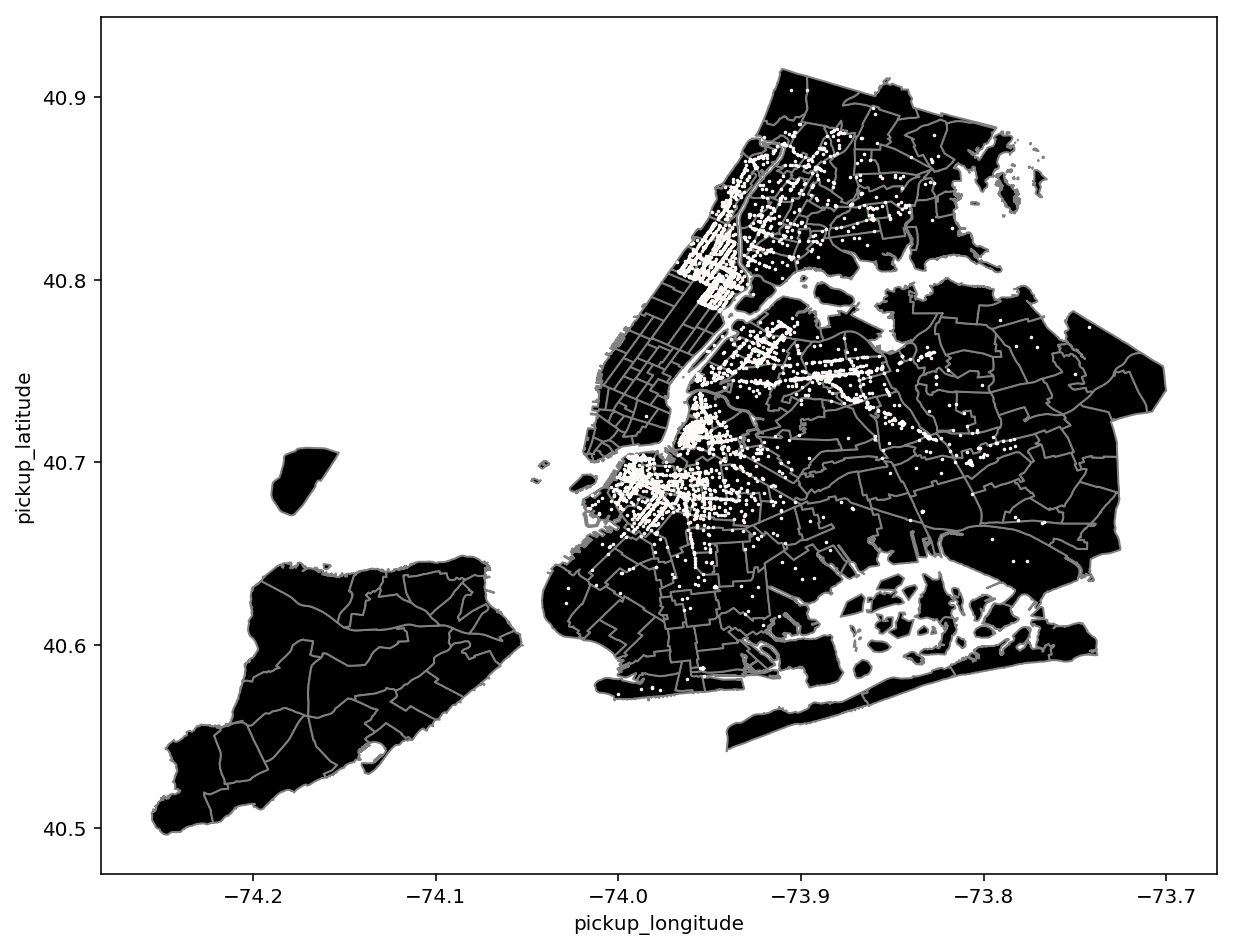

In [35]:
base_map = gpd.read_file(shp_path+'taxi_zones.shp')
base_map = base_map.to_crs({'init': 'epsg:4326'})

fig, ax = plt.subplots(1, figsize=(10,10))
# base_map.plot(ax=ax, edgecolor='red')
base_map.plot(ax=ax, alpha=1, color='black', edgecolor='gray')

sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=geo_green_samp, 
                s=1, alpha=1, color='red');

# minx, miny, maxx, maxy = geo_green_samp.total_bounds
# ax.set_xlim(minx-0.25, maxx+0.25)
# ax.set_ylim(miny-0.25, maxy+0.25)

In [57]:
base_map

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445299999996 40.6949959999999,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,(POLYGON ((-73.82337597260663 40.6389870471767...
...,...,...,...,...,...,...,...
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,(POLYGON ((-73.94383256699986 40.7828590889999...
262,263,0.037017,0.000066,Yorkville West,263,Manhattan,POLYGON ((-73.95218621999996 40.77301984499992...


In [24]:
point = Point(0.5,2.5)
polygon = Polygon([(0,0), (1,0), (1,1), (0,1)])

In [25]:
polygon.contains(point)

False

In [89]:
def assign_locid(base_map, lon, lat):
    point = Point(lon, lat)
    
    base_map.loc[:,'temp'] = base_map.apply(
        lambda row: row.geometry.contains(point) * row.LocationID, axis=1)
    return np.sum(base_map.temp)

In [47]:
import timeit
s_ = timeit.default_timer()

geo_green_samp['plocid'] = geo_green_samp.apply(
    lambda row: assign_locid(base_map, row.pickup_longitude, row.pickup_latitude), axis=1)

print(timeit.default_timer() - s_)

544.5096491289996


In [88]:
zone_cen = pd.DataFrame(np.hstack((base_map.geometry.centroid.x,
                                  base_map.geometry.centroid.y)).reshape(263,2,order='F'), 
                        columns=['lon','lat'])

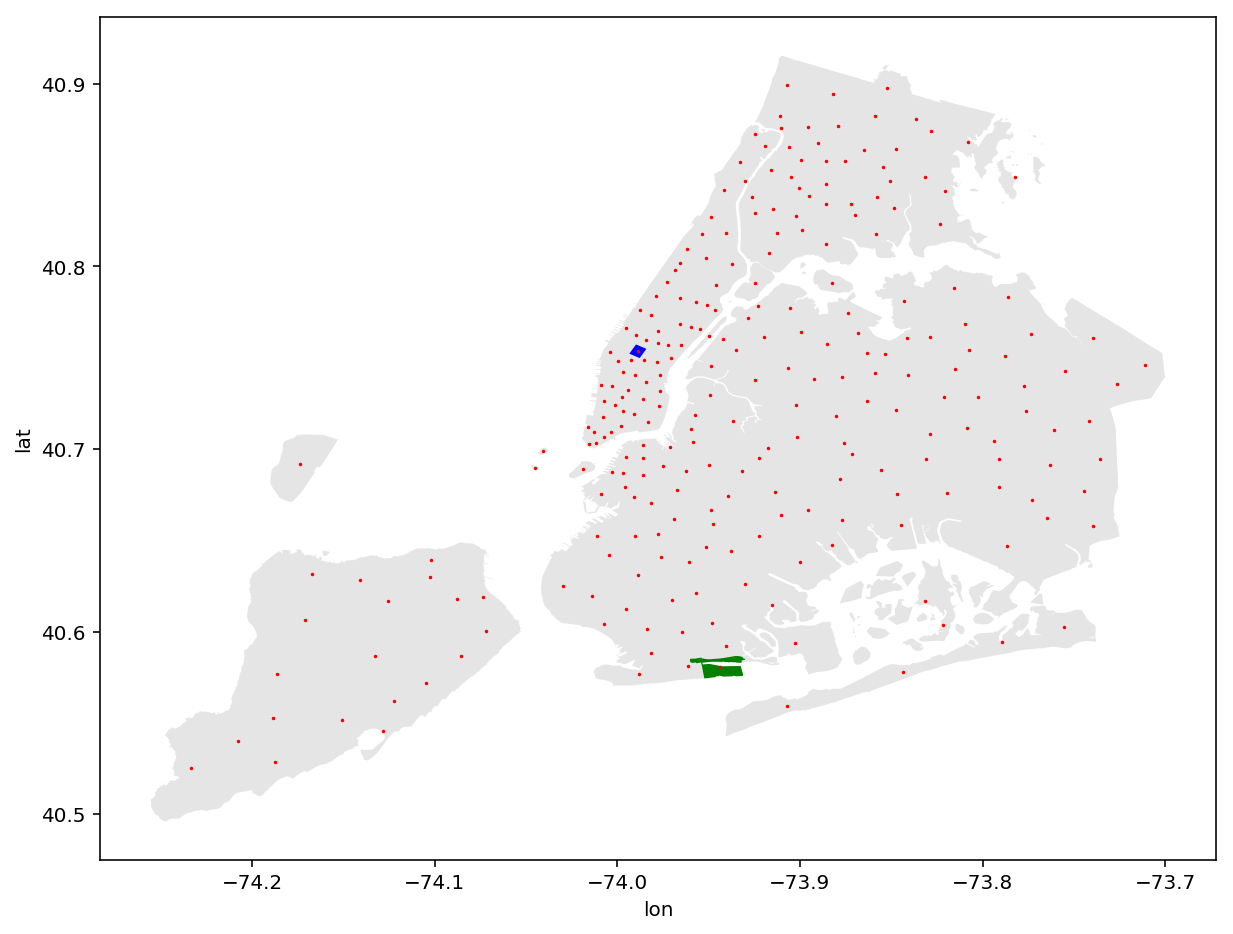

In [91]:
fig, ax = plt.subplots(1, figsize=(10,10))
base_map.plot(ax=ax, alpha=0.1, color='black', edgecolor=None)
base_map.query("LocationID==100").plot(ax=ax, alpha=1, color='blue', edgecolor=None)
base_map.query("LocationID==150").plot(ax=ax, alpha=1, color='green', edgecolor=None)

sns.scatterplot(x='lon', y='lat', data=zone_cen, s=1, color='red', edgecolor=None);

In [85]:
base_map.geometry.centroid

0      POINT (-74.17400027276298 40.69183120640134)
1      POINT (-73.83129854302199 40.61674529165965)
                           ...                     
261     POINT (-73.94651035601467 40.7759324031498)
262    POINT (-73.95100987481804 40.77876585543421)
Length: 263, dtype: object